# QR factorization

Square matrix $A$ can be decomposed as $A=QR$
where $Q$ is an orthogonal matrix ($Q^{*}Q=QQ^{*}=I$) and $R$ is an upper triangular matrix. If $A$ is invertible and $R$ is positive, then the factorization is unique.

Furthermore, there are several methods for computing the $QR$ decomposition such as the Gram–Schmidt process, and the Householder transformations, ... Here, we use the Gram–Schmidt process.

Consider matrix $A = \begin{bmatrix}| & | &  & | \\ \vec{a}_1 & \vec{a}_2 & \dots & \vec{a}_n \\ | & | &  & | \end{bmatrix}$ were $ \vec{a}_i$ are the columns of the full column rank matrix $A$. Now, define the projection as follows:

\begin{align*}
\operatorname{proj}_{\vec{u}}\vec{a} =
\frac{ \left\langle \vec{u},~\vec{a} \right\rangle }{\left\langle \vec{u},~\vec{u}\right\rangle} \vec{u}
\end{align*}
Therefore,
\begin{align*}
\vec{u}_{1} & = \vec{a}_{1}, &\vec{e}_{1}& = \frac{\vec{u}_{1}}{\|\vec{u}_{1}\|},\\
\vec{u}_{2} & = \vec{a}_{2} - \operatorname{proj}_{\vec{u}_{1}}\,\vec{a}_{2},&\vec{e}_{2} &=
\frac{\vec{u}_{2}}{\|\vec{u}_{2}\|},\\
\vec{u}_{3}&=\vec{a}_{3}-\operatorname {proj} _{\vec{u}_{1}}\,\vec{a}_{3}-\operatorname {proj} _{\vec{u}_{2}}\,\vec{a}_{3},&\vec{e}_{3}&=
\frac{\vec{u}_{3}}{\|\vec{u}_{3}\|},\\
&\vdots & &\vdots \\
\vec{u}_{k}&=\vec{a}_{k}-\sum _{j=1}^{k-1}\operatorname {proj} _{\vec{u}_{j}}\,\vec{a}_{k},&\vec{e}_{k}&=
\frac{\vec{u}_{k}}{\|\vec{u}_{k}\|}.
\end{align*}
Now, $\vec{a}_{i}$ can be expressed as

\begin{align*}
\begin{cases}
\vec{a}_{1}=\langle \vec{e}_{1},\vec{a}_{1}\rangle \vec{e}_{1}\\
\vec{a}_{2}=\langle \vec{e}_{1},\vec{a}_{2}\rangle \vec{e}_{1}+\langle \vec{e}_{2},\vec{a}_{2}\rangle \vec{e}_{2}\\
\vec{a}_{3}=\langle \vec{e}_{1},\vec{a}_{3}\rangle \vec{e}_{1}+\langle \vec{e}_{2},\vec{a}_{3}\rangle \vec{e}_{2}+\langle \vec{e}_{3},\vec{a}_{3}\rangle \vec{e}_{3}\\&\vdots \\
\vec{a}_{k}=\sum _{j=1}^{k}\langle \vec{e}_{j},\vec{a}_{k}\rangle \vec{e}_{j}
\end{cases}
\end{align*}
where $\left\langle \vec{e}_{i},\vec{a}_{i}\right\rangle =\left\|\vec{u}_{i}\right\|$. This can be written in matrix form:
\begin{align*}
A&=QR
\end{align*}
\begin{align*}
\begin{bmatrix}a_{11} & a_{12} & \dots & a_{1n} \\ a_{21} & a_{22} & \dots & a_{2n} \\
a_{31} & a_{32} & \dots & a_{3n} \\
\vdots & \vdots &   & \vdots \\ a_{n1} & a_{n2} & \dots & a_{nn} \end{bmatrix} &=
\begin{bmatrix}| & | &  & | \\ \vec{e}_1 & \vec{e}_2 & \dots & \vec{e}_n\\
| & | &  & | \end{bmatrix}
\begin{bmatrix}
\langle \vec{e}_{1},\vec{a}_{1}\rangle &\langle \vec{e}_{1},\vec{a}_{2}\rangle &\langle \vec{e}_{1},\vec{a}_{3}\rangle &\ldots
& \langle \vec{e}_{1},\vec{a}_{n}\rangle \\
0&\langle \vec{e}_{2},\vec{a}_{2}\rangle &\langle \vec{e}_{2},\vec{a}_{3}\rangle &\ldots & \langle \vec{e}_{2},\vec{a}_{n}\rangle\\
0&0&\langle \vec{e}_{3},\vec{a}_{3}\rangle &\ldots & \langle \vec{e}_{3},\vec{a}_{n}\rangle\\
\vdots &\vdots &\vdots &\ddots &\vdots\\
0 & 0 & \dots & \dots & \langle \vec{e}_{n},\vec{a}_{n} \rangle \end{bmatrix}.
\end{align*}

See {cite:ps}`khoury2016numerical, allaire2008numerical` for the full derivation of this algorithm.

::::{tab-set}

:::{tab-item} Python Code
```python
import numpy as np
import pandas as pd

def myQR(A):
    '''
    Square matrix $A$ can be decomposed as A=QR
    where Q is an orthogonal matrix and
    R is an upper triangular matrix.

    Parameters
    ----------
    A : numpy array
        DESCRIPTION. Matrix A

    Returns
    -------
    Q : numpy array
        DESCRIPTION. Matrix Q from A = QR
    R : numpy array
        DESCRIPTION. Matrix R from A = QR

    '''
    n = A.shape[0]
    Q = np.zeros([n,n], dtype = float)
    R = np.zeros([n,n], dtype = float)
    A = A.astype(float)
    for j in range(n):
        T = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            T -= R[i, j] * Q[:, i]
        R[j, j] = np.sqrt(np.dot(T, T))
        Q[:, j] = T /R[j, j]
        del T
    return Q, R
```
:::

:::{tab-item} MATLAB Code
```MATLAB
function [Q, R] = myQR(A)
%{
Square matrix $A$ can be decomposed as A=QR
where Q is an orthogonal matrix and
R is an upper triangular matrix.

Parameters
----------
A : numpy array
    DESCRIPTION. Matrix A

Returns
-------
Q : numpy array
    DESCRIPTION. Matrix Q from A = QR
R : numpy array
    DESCRIPTION. Matrix R from A = QR

%}
n=length(A);
Q =zeros(n,n);
R = zeros(n,n);
for j=1:n
    T = A(:, j);
    for i=1:j
        R(i, j) = dot(Q(:, i), A(:, j));
        T = T - R(i, j) * Q(:, i);
    end
    R(j, j) = sqrt(dot(T, T));
    Q(:, j) = T /R(j, j);
end

```
:::

::::

In [1]:
import sys
sys.path.insert(0,'..')
import hd_tools as hd

Loading BokehJS ...

<font color='Blue'><b>Example</b></font>: Apply QR decomposition on the following matrix and identify $Q$ and $R$.
\begin{align*}A = \left[\begin{array}{cccc} 7 & 3 & -1 & 2\\ 3 & 8 & 1 & -4\\ -1 & 1 & 4 & -1\\ 2 & -4 & -1 & 6 \end{array}\right].\end{align*}

<font color='Green'><b>Solution</b></font>: We have,

In [2]:
import numpy as np
from hd_Matrix_Decomposition import myQR
from IPython.display import display, Latex
from sympy import init_session, init_printing, Matrix
A = np.array([ [7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])
Q, R = myQR(A)
display(Latex(r'Q ='), Matrix(np.round(Q, 2)))
display(Latex(r'R ='), Matrix(np.round(R, 2)))
display(Latex(r'QR ='), Matrix(np.round(Q@R, 2)))
display(Latex(r'QQ^T ='), Matrix(np.round(Q@(Q.T), 2)))
display(Latex(r'Q^TQ ='), Matrix(np.round((Q.T)@Q, 2)))

<IPython.core.display.Latex object>

Matrix([
[ 0.88, -0.12,  0.11, -0.44],
[ 0.38,  0.75, -0.06,  0.53],
[-0.13,  0.19,  0.97, -0.06],
[ 0.25, -0.62,   0.2,  0.72]])

<IPython.core.display.Latex object>

Matrix([
[7.94, 4.54, -1.26,  1.89],
[   0, 8.33,  2.25, -7.15],
[   0,    0,  3.52,  0.69],
[   0,    0,     0,  1.35]])

<IPython.core.display.Latex object>

Matrix([
[ 7.0,  3.0, -1.0,  2.0],
[ 3.0,  8.0,  1.0, -4.0],
[-1.0,  1.0,  4.0, -1.0],
[ 2.0, -4.0, -1.0,  6.0]])

<IPython.core.display.Latex object>

Matrix([
[1.0,   0,   0,   0],
[  0, 1.0,   0,   0],
[  0,   0, 1.0,   0],
[  0,   0,   0, 1.0]])

<IPython.core.display.Latex object>

Matrix([
[1.0,   0,   0,   0],
[  0, 1.0,   0,   0],
[  0,   0, 1.0,   0],
[  0,   0,   0, 1.0]])

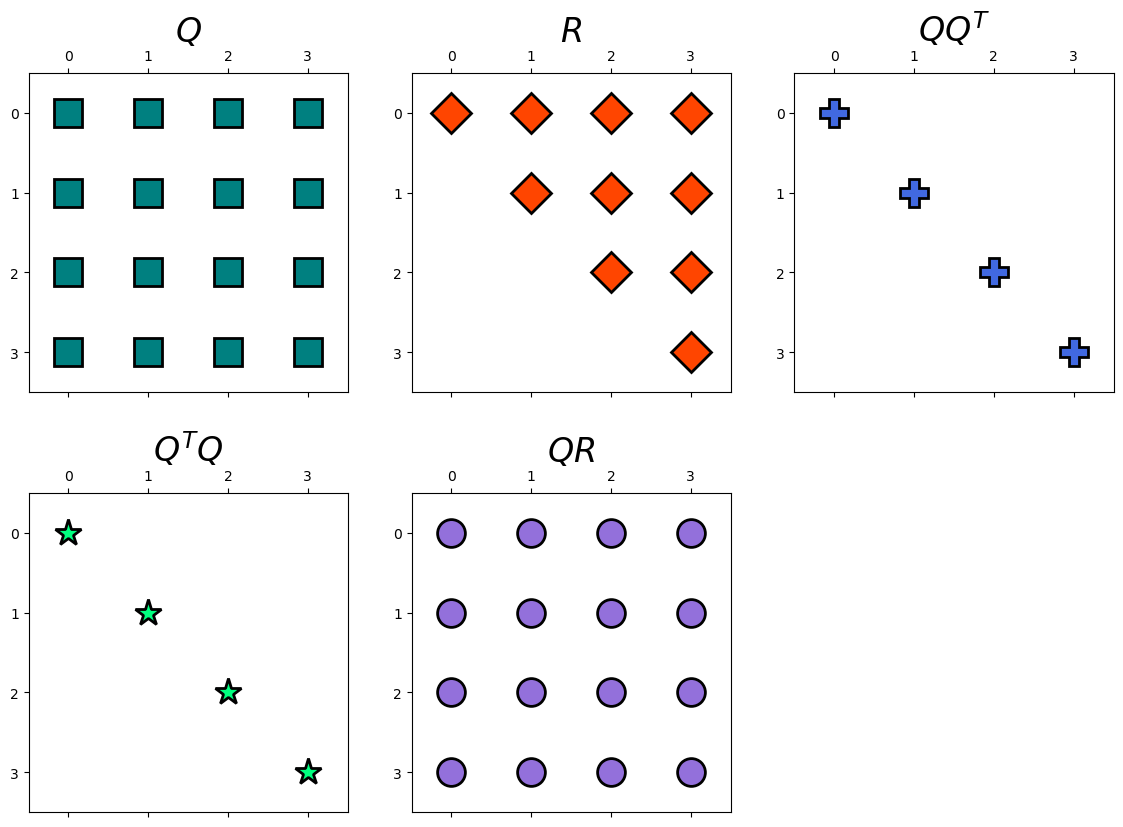

In [3]:
hd.matrix_decomp_fig(mats = [Q, R, np.round(Q@(Q.T), 1), np.round((Q.T)@Q, 1), np.round(np.matmul(Q, R), 2)],
                     labels = ['$Q$', '$R$', '$QQ^T$', '$Q^TQ$', '$QR$'],
                     nrows=2, ncols=3, figsize=(14, 10))

Note that we could get a similar results using function, [```np.linalg.qr```](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html).

In [4]:
import scipy.linalg as linalg
Q, R = linalg.qr(A)
display(Latex(r'Q ='), Matrix(np.round(Q, 2)))
display(Latex(r'R ='), Matrix(np.round(R, 2)))
display(Latex(r'QR ='), Matrix(np.round(Q@R, 2)))
display(Latex(r'QQ^T ='), Matrix(np.round(Q@(Q.T), 2)))
display(Latex(r'Q^TQ ='), Matrix(np.round((Q.T)@Q, 2)))

<IPython.core.display.Latex object>

Matrix([
[-0.88,  0.12, -0.11, -0.44],
[-0.38, -0.75,  0.06,  0.53],
[ 0.13, -0.19, -0.97, -0.06],
[-0.25,  0.62,  -0.2,  0.72]])

<IPython.core.display.Latex object>

Matrix([
[-7.94, -4.54,  1.26, -1.89],
[    0, -8.33, -2.25,  7.15],
[    0,     0, -3.52, -0.69],
[    0,     0,     0,  1.35]])

<IPython.core.display.Latex object>

Matrix([
[ 7.0,  3.0, -1.0,  2.0],
[ 3.0,  8.0,  1.0, -4.0],
[-1.0,  1.0,  4.0, -1.0],
[ 2.0, -4.0, -1.0,  6.0]])

<IPython.core.display.Latex object>

Matrix([
[1.0,   0,   0,   0],
[  0, 1.0,   0,   0],
[  0,   0, 1.0,   0],
[  0,   0,   0, 1.0]])

<IPython.core.display.Latex object>

Matrix([
[1.0,   0,   0,   0],
[  0, 1.0,   0,   0],
[  0,   0, 1.0,   0],
[  0,   0,   0, 1.0]])

## Solving Linear systems using QR factorization

We can solve the linear system $Ax=b$ for $x$ using QR factorization. To demonstrate this, we use the following example,

<font color='Blue'><b>Example</b></font>:
Solve the following linear system using QR decomposition.
\begin{align*}
\begin{cases}
7\,x_{1}+3\,x_{2}-x_{3}+2\,x_{4}=18\\ 3\,x_{1}+8\,x_{2}+x_{3}-4\,x_{4}=6\\ x_{2}-x_{1}+4\,x_{3}-x_{4}=9\\ 2\,x_{1}-4\,x_{2}-x_{3}+6\,x_{4}=15
\end{cases}
\end{align*}

<font color='Green'><b>Solution</b></font>:

Let $A=\left[\begin{array}{cccc} 7 & 3 & -1 & 2\\ 3 & 8 & 1 & -4\\ -1 & 1 & 4 & -1\\ 2 & -4 & -1 & 6 \end{array}\right]$
and $b=\left[\begin{array}{c} 18\\ 6\\ 9\\ 15 \end{array}\right]$.
Then, this linear system can be also expressed as follows,
\begin{align*}
Ax=(QR)x=Q(Rx)=b.
\end{align*}
We have,

In [5]:
A = np.array([ [7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])
b = np.array([[18],[ 6],[ 9],[15]])
Q, R = myQR(A)
display(Latex(r'Q ='), Matrix(np.round(Q, 2)))
display(Latex(r'R ='), Matrix(np.round(R, 2)))

<IPython.core.display.Latex object>

Matrix([
[ 0.88, -0.12,  0.11, -0.44],
[ 0.38,  0.75, -0.06,  0.53],
[-0.13,  0.19,  0.97, -0.06],
[ 0.25, -0.62,   0.2,  0.72]])

<IPython.core.display.Latex object>

Matrix([
[7.94, 4.54, -1.26,  1.89],
[   0, 8.33,  2.25, -7.15],
[   0,    0,  3.52,  0.69],
[   0,    0,     0,  1.35]])

Now we can solve the following linear systems instead
\begin{align*}\begin{cases}Qy = b,\\Rx=y.\end{cases}\end{align*}

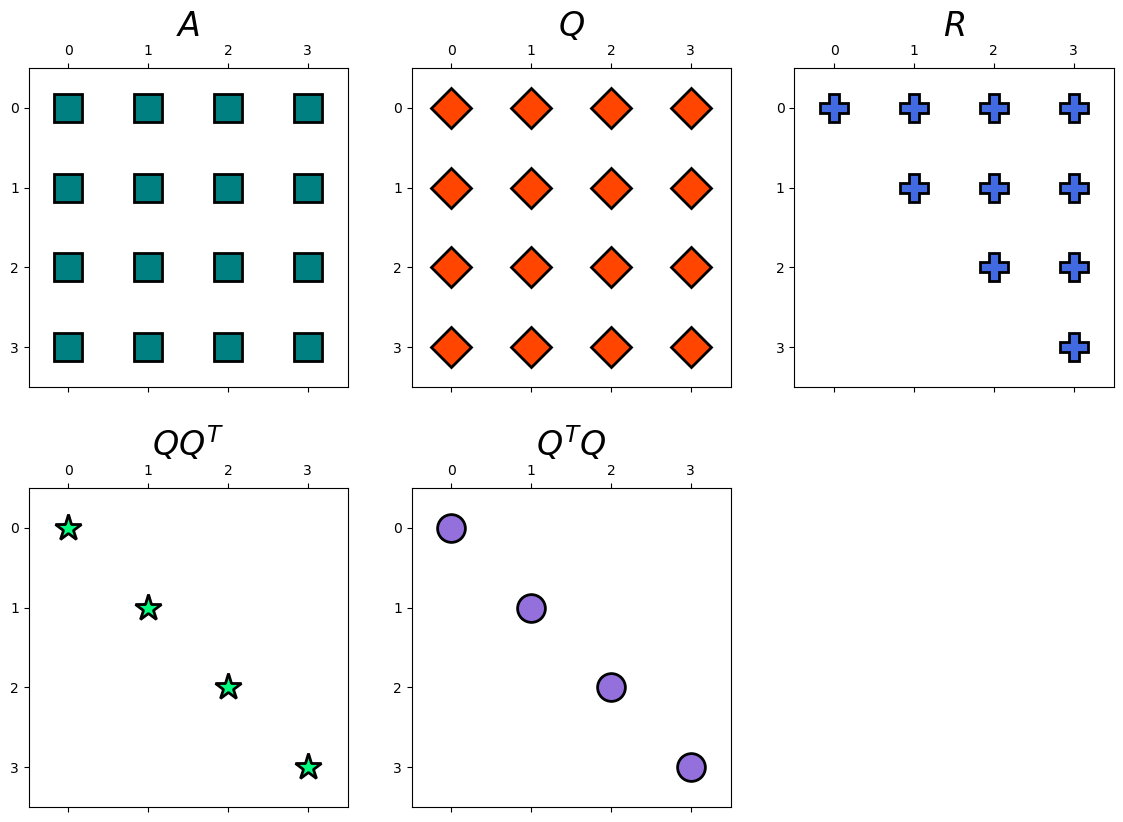

In [6]:
hd.matrix_decomp_fig(mats = [A, Q, R, np.round(Q@(Q.T), 1), np.round((Q.T)@Q, 1)],
                     labels = ['$A$', '$Q$', '$R$', '$QQ^T$', '$Q^TQ$'],
                     nrows=2, ncols=3, figsize=(14, 10))

In [7]:
# solving y
y = np.linalg.solve(Q, b)
display(Latex(r'y ='), Matrix(np.round(y, 2)))

<IPython.core.display.Latex object>

Matrix([
[20.79],
[-5.19],
[13.32],
[ 5.42]])

In [8]:
# solving Ux=y for x
x = np.linalg.solve(R, y)
display(Latex(r'x ='), Matrix(np.round(x, 2)))

<IPython.core.display.Latex object>

Matrix([
[1.0],
[2.0],
[3.0],
[4.0]])

Let's now solve the linear system directly and compare the results.

In [9]:
x_new = linalg.solve(A, b)
display(Latex(r'x ='), Matrix(np.round(x_new, 2)))

<IPython.core.display.Latex object>

Matrix([
[1.0],
[2.0],
[3.0],
[4.0]])